In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
def font_size(s=22):
    font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : s}

    matplotlib.rc('font', **font)

In [2]:
# Read in files and name vars with syntax [male/female]_[authorship_position]_[numauths]
def cols(name):
    return [name + '_year', name + '_count']

# Female
# 1st auths
f_0_3 = pd.read_csv('female_0th_auth_book-chapter_3or_more_auths_per_yr.csv')
f_0_3.index = f_0_3['_id']
f_0_3.columns = cols('f_0_3')

f_0_4 = pd.read_csv('female_0th_auth_book-chapter_4or_more_auths_per_yr.csv')
f_0_4.index = f_0_4['_id']
f_0_4.columns = cols('f_0_4')

# 2nd auths
f_1_3 = pd.read_csv('female_1th_auth_book-chapter_3or_more_auths_per_yr.csv')
f_1_3.index = f_1_3['_id']
f_1_3.columns = cols('f_1_3')

f_1_4 = pd.read_csv('female_1th_auth_book-chapter_4or_more_auths_per_yr.csv')
f_1_4.index = f_1_4['_id']
f_1_4.columns = cols('f_1_4')


# Male
# 1st auths
m_0_3 = pd.read_csv('male_0th_auth_book-chapter_3or_more_auths_per_yr.csv')
m_0_3.index = m_0_3['_id']
m_0_3.columns = cols('m_0_3')

m_0_4 = pd.read_csv('male_0th_auth_book-chapter_4or_more_auths_per_yr.csv')
m_0_4.index = m_0_4['_id']
m_0_4.columns = cols('m_0_4')

# 2nd auths
m_1_3 = pd.read_csv('male_1th_auth_book-chapter_3or_more_auths_per_yr.csv')
m_1_3.index = m_1_3['_id']
m_1_3.columns = cols('m_1_3')

m_1_4 = pd.read_csv('male_1th_auth_book-chapter_4or_more_auths_per_yr.csv')
m_1_4.index = m_1_4['_id']
m_1_4.columns = cols('m_1_4')


In [3]:
# Female
counter = 0
for d in [f_0_3, f_0_4, f_1_3, f_1_4]:
    if counter == 0:
        master = d
    else:
        master = master.join(d)
    counter += 1
    
female = master[(master.index < 2017) & (master.index >= 1960)]

# Male
counter = 0
for d in [m_0_3, m_0_4, m_1_3, m_1_4]:
    if counter == 0:
        master = d
    else:
        master = master.join(d)
    counter += 1

male = master[(master.index < 2017) & (master.index >= 1960)]

In [4]:
female.head()

,f_0_3_year,f_0_3_count,f_0_4_year,f_0_4_count,f_1_3_year,f_1_3_count,f_1_4_year,f_1_4_count
_id,,,,,,,,
1960.0,1960.0,7,1960.0,2,1960.0,13,1960.0,2
1961.0,1961.0,2,1961.0,33,1961.0,55,1961.0,5
1962.0,1962.0,3,1962.0,2,1962.0,8,1962.0,6
1963.0,1963.0,1,1963.0,7,1963.0,24,1963.0,10
1964.0,1964.0,4,1964.0,10,1964.0,21,1964.0,42


In [5]:
male.head()

,m_0_3_year,m_0_3_count,m_0_4_year,m_0_4_count,m_1_3_year,m_1_3_count,m_1_4_year,m_1_4_count
_id,,,,,,,,
1960.0,1960.0,180,1960.0,28,1960.0,159,1960.0,15
1961.0,1961.0,113,1961.0,181,1961.0,109,1961.0,209
1962.0,1962.0,204,1962.0,78,1962.0,205,1962.0,55
1963.0,1963.0,213,1963.0,73,1963.0,156,1963.0,65
1964.0,1964.0,202,1964.0,94,1964.0,206,1964.0,65


In [6]:
# Female
female['female_firsts'] = female.f_0_3_count + female.f_0_4_count
female['female_seconds'] = female.f_1_3_count + female.f_1_4_count
female_totals = female.female_seconds + female.female_firsts

female['female_first_prop'] = female.female_firsts / female_totals
numerator = (female['female_first_prop']*(1-female['female_first_prop']))
female['female_first_prop_error'] = 1.96*(np.sqrt(numerator/female_totals))
female['female_first_prop_max_estimate'] = female['female_first_prop'] + female['female_first_prop_error']
female['female_first_prop_min_estimate'] = female['female_first_prop'] - female['female_first_prop_error']


# Male
male['male_firsts'] = male.m_0_3_count + male.m_0_4_count
male['male_seconds'] = male.m_1_3_count + male.m_1_4_count
male_totals = male.male_seconds + male.male_firsts

male['male_first_prop'] = male.male_firsts / male_totals
numerator = (male['male_first_prop']*(1-male['male_first_prop']))
male['male_first_prop_error'] = 1.96*(np.sqrt(numerator/male_totals))
male['male_first_prop_max_estimate'] = male['male_first_prop'] + male['male_first_prop_error']
male['male_first_prop_min_estimate'] = male['male_first_prop'] - male['male_first_prop_error']

/Users/ilya/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ilya/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ilya/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

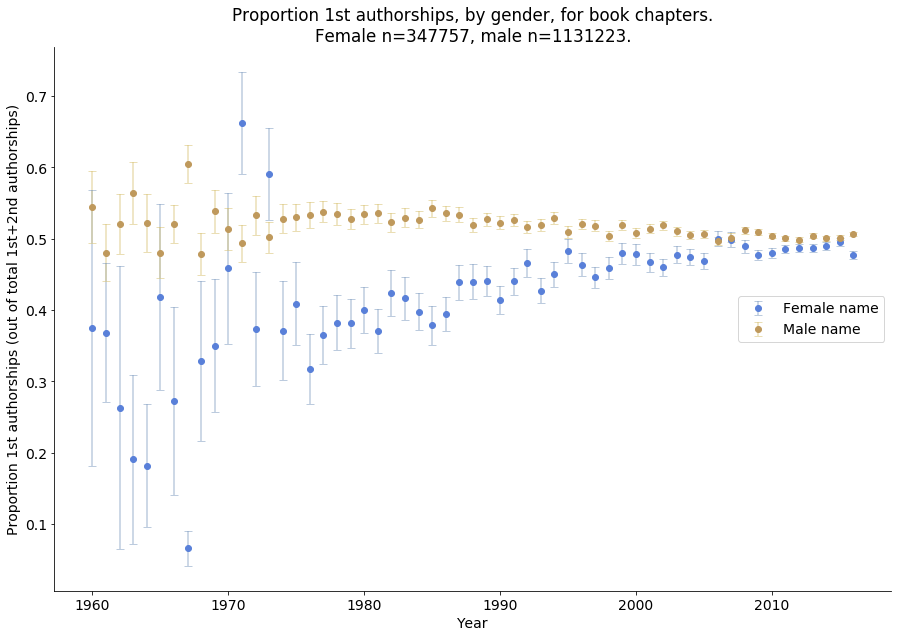

In [9]:
plt.figure(figsize=(15,10))
font_size(14)

# Female
plt.errorbar(x=female.index, y=female.female_first_prop, yerr=female.female_first_prop_error, fmt='o', label='Female name',
            ecolor=[.48, .6, .75,.5], color=[.35, .5, .85,1], capsize=4)
# Male
plt.errorbar(x=male.index, y=male.male_first_prop, yerr=male.male_first_prop_error, fmt='o', label='Male name',
            ecolor=[.84,.75, .42, .5], color=[.75,.6, .36, 1], capsize=4)

plt.legend(loc=5)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel('Year')
plt.ylabel('Proportion 1st authorships (out of total 1st+2nd authorships)')
plt.title("Proportion 1st authorships, by gender, for book chapters.\nFemale n={}, male n={}.".format(
    female_totals.sum(), male_totals.sum()), color='black')
plt.savefig('/Users/ilya/code/publishing_biases/analyze/analyses/book_chapter/prop_1st_authorships.png',
           dpi=400)

In [10]:
347757+1131223

1478980